# International Education Analysis
## by Scott Haluck

## Preliminary Wrangling

> The Programme for International Student Assessment (PISA) 2012 study gathered data about student performance, student life, and school quality from 65 countries. The data is expansive in both breadth and depth, so it can be analyzed from a variety of perspectives.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [95]:
# import all data
pisa = pd.read_csv('./pisa2012.csv', encoding='latin-1', low_memory=False)

In [96]:
# identified inconsistent country name formatting
(pisa.NC == 'United States of America ').sum()

10294

In [97]:
# initial investigation into data format
print(pisa.shape)
print(pisa.dtypes.sample(10))
print(pisa.info())
pisa.sample(5)

(485490, 636)
ST87Q04      object
ST70Q02     float64
EC04Q04A    float64
EC03Q01      object
ST42Q02      object
EC05Q01      object
PV3MACS     float64
ST80Q05      object
IC02Q06      object
ST93Q07      object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB
None


,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
360300,360301,Netherlands,5280000,NLD0002,OECD,Netherlands,34,851,9,2.0,...,12.8481,13.7742,69.7533,71.8753,13.0042,12.8370,18,1,0.2202,22NOV13
297829,297830,Lithuania,4400000,LTU0015,Non-OECD,Lithuania,71,1644,8,7.0,...,10.5144,11.1764,10.4868,10.5035,11.1269,11.0456,64,2,0.2174,22NOV13
80478,80479,Canada,1240000,CAN1092,OECD,Canada,241,6009,10,2.0,...,31.3840,31.3840,10.4613,10.4613,31.3840,10.4613,58,1,0.0601,22NOV13
414464,414465,Romania,6420000,ROU0002,Non-OECD,Romania,70,1994,9,2.0,...,12.8182,12.8182,12.8182,12.8182,38.4546,38.4546,13,1,0.1819,22NOV13
357289,357290,Malaysia,4580000,MYS0102,Non-OECD,Malaysia,96,3037,10,2.0,...,119.7687,119.7687,119.7687,119.7687,39.9229,119.7687,46,1,0.1848,22NOV13


### What is the structure of your dataset?

> The data contains over 400,000 responses with over 600 variables. The variables are a variety of formats: nominal and ordinal categorical, discrete and continuous quantitative, and plain text. The values are simplified and standard scores calculated around Organisation for Economic Co-operation and Development (OECD) characteristics.

### What is/are the main feature(s) of interest in your dataset?

> Student demographics and experience that may contribute to academic achievement:
* Student Demographics
* Family Demographics
* School characteristics

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The summary variables in the data set combine similar measures of student information into a single quantitative or categorical value. This allows for direct comparison between countries and students for analysis. The following variables will be used:
* Student Demographics
    - identification (STIDSTD)
    - country of residence (OECD, NC)
    - gender (ST04Q01)
    - enrollment in preschool (ST05Q01)
    - age at which education began (ST06Q01)
    - immigration status (IMMIG, CULTDIST)
    - language acquisition (EC05Q01, EC06Q01)
    - access to education resources (HEDRES)
    - academic measurements (PV1MATH, PV1READ, PV1SCIE, ANXMAT, MATBEH, MATHEFF, MATINTFC, MATWKETH)
    - social measurements (BELONG, SUBNORM)
* Family Demographics
    - parental levels of education (HISCED, FISCED, MISCED)
    - parental employment (HISEI, OCOD2, OCOD1, BFMJ2, BMMJ1)
    - wealth (CULTPOS, HOMEPOS, WEALTH)
    - status (ESCS)
    - structure (FAMSTRUC)
* School characteristics
    - academic routines (LMINS, MMINS, SMINS)
    - teacher behaviors (CLSMAN, MTSUP, STUDREL, TCHBEHFA, TCHBEHSO, TCHBEHTD, TEACHSUP)


In [99]:
# identify columns of interest and appropriate column names
cols = {'STIDSTD':'student_id',
        'ST04Q01':'gender',
        'OECD':'oecd',
        'NC':'country',
        'ST05Q01':'preschool',
        'ST06Q01':'age_edu_start',
        'IMMIG':'immigration',
        'CULTDIST':'culture_dist',
        'EC05Q01':'prim_lang',
        'EC06Q01':'age_lang_start',
        'HEDRES':'home_edu_res',
        'PV1MATH':'math_score',
        'PV1READ':'read_score',
        'PV1SCIE':'science_score', 
        'ANXMAT':'math_anxiety',
        'MATBEH':'math_behaviors',
        'MATHEFF':'math_efficacy',
        'MATINTFC':'math_intentions',
        'MATWKETH':'math_work_ethic',
        'SUBNORM':'math_norm',
        'BELONG':'belong',
        'HISCED':'parent_edu',
        'FISCED':'father_edu',
        'MISCED':'mother_edu',
        'HISEI':'parent_occ', 
        'OCOD2':'father_occ',
        'OCOD1':'mother_occ',
        'BFMJ2':'father_occ_status',
        'BMMJ1':'mother_occ_status',
        'CULTPOS':'poss_culture',
        'HOMEPOS':'poss_home', 
        'WEALTH':'wealth',
        'ESCS':'status_index',
        'FAMSTRUC':'fam_struct',
        'LMINS':'lang_min',
        'MMINS':'math_min',
        'SMINS':'science_min',
        'CLSMAN':'teacher_math_man',
        'MTSUP':'teacher_math_sup',
        'STUDREL':'teacher_rel',
        'TCHBEHFA':'teacher_form',
        'TCHBEHSO':'teacher_stud_focus',
        'TCHBEHTD':'teacher_lect',
        'TEACHSUP':'teacher_supp'}

# gather only the columns of interest
pisa_data = pisa.loc[:,cols]
# rename columns with more description
pisa_data.rename(columns=cols, inplace=True)

In [100]:
# test that renaming was successful
pisa_data.sample(5)

,student_id,gender,oecd,country,preschool,age_edu_start,immigration,culture_dist,prim_lang,age_lang_start,...,lang_min,math_min,science_min,teacher_math_man,teacher_math_sup,teacher_rel,teacher_form,teacher_stud_focus,teacher_lect,teacher_supp
288068,3017,Female,Non-OECD,Kazakhstan,No,6.0,Native,NaN,NaN,NaN,...,NaN,NaN,NaN,0.3255,-0.2395,1.13,1.3625,0.4855,0.4297,-0.09
21581,5339,Male,Non-OECD,Argentina,"Yes, for more than one year",6.0,Native,NaN,NaN,NaN,...,240.0,240.0,120.0,1.2923,1.8433,1.13,0.7644,1.1547,0.7228,1.68
186033,1530,Female,OECD,France,"Yes, for one year or less",6.0,Native,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1208,1209,Female,Non-OECD,Albania,"Yes, for one year or less",7.0,Native,NaN,NaN,NaN,...,NaN,NaN,NaN,0.7640,1.1169,1.13,-0.5945,-1.5999,-0.3204,-0.28
196026,6910,Male,OECD,United Kingdom (Scotland),"Yes, for more than one year",5.0,Native,NaN,NaN,NaN,...,NaN,NaN,NaN,0.3255,0.6709,0.45,0.2509,0.7183,-0.5612,0.34


In [101]:
# fix inconsistent formatting in country name
pisa_data.country = pisa_data.country.apply(lambda x: x.strip())

In [102]:
# test that formatting was successful
(pisa_data.country == 'United States of America ').sum()

0

In [103]:
# store data of interest for faster loading in the future
pisa_data.to_csv('pisa_summ.csv',index=False)

In [104]:
# load the data of interest
pisa_data = pd.read_csv('pisa_summ.csv', low_memory=False)
pisa_data.head()

,student_id,gender,oecd,country,preschool,age_edu_start,immigration,culture_dist,prim_lang,age_lang_start,...,lang_min,math_min,science_min,teacher_math_man,teacher_math_sup,teacher_rel,teacher_form,teacher_stud_focus,teacher_lect,teacher_supp
0,1,Female,Non-OECD,Albania,No,6.0,Native,NaN,NaN,NaN,...,NaN,NaN,NaN,-1.3771,-0.9508,-1.04,1.3625,0.9374,0.4297,1.68
1,2,Female,Non-OECD,Albania,"Yes, for more than one year",7.0,Native,NaN,NaN,NaN,...,315.0,270.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,Non-OECD,Albania,"Yes, for more than one year",6.0,Native,NaN,NaN,NaN,...,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Female,Non-OECD,Albania,"Yes, for more than one year",6.0,Native,NaN,NaN,NaN,...,135.0,135.0,90.0,NaN,1.6748,NaN,0.7644,3.3108,2.3916,1.68
4,5,Female,Non-OECD,Albania,"Yes, for more than one year",6.0,Native,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.0784,0.6709,-0.02,0.7644,0.9374,0.4297,0.11


In [105]:
# examine data types for variables
pisa_data.dtypes

student_id              int64
gender                 object
oecd                   object
country                object
preschool              object
age_edu_start         float64
immigration            object
culture_dist          float64
prim_lang              object
age_lang_start         object
home_edu_res          float64
math_score            float64
read_score            float64
science_score         float64
math_anxiety          float64
math_behaviors        float64
math_efficacy         float64
math_intentions       float64
math_work_ethic       float64
math_norm             float64
belong                float64
parent_edu             object
father_edu             object
mother_edu             object
parent_occ            float64
father_occ             object
mother_occ             object
father_occ_status     float64
mother_occ_status     float64
poss_culture          float64
poss_home             float64
wealth                float64
status_index          float64
fam_struct

In [106]:
# examine the format of the object type in age_lang_start
pisa_data.age_lang_start.unique()

array([nan, '0 to 3 years', '4 to 6 years', '10 to 12 years',
       '7 to 9 years', '13 years or older'], dtype=object)

In [107]:
# investigate summary statistcs for numerical variables
pisa_data.describe()

,student_id,age_edu_start,culture_dist,home_edu_res,math_score,read_score,science_score,math_anxiety,math_behaviors,math_efficacy,...,lang_min,math_min,science_min,teacher_math_man,teacher_math_sup,teacher_rel,teacher_form,teacher_stud_focus,teacher_lect,teacher_supp
count,485490.000000,457994.000000,13380.000000,477772.000000,485490.000000,485490.000000,485490.000000,314764.000000,313847.000000,315948.000000,...,282866.000000,283303.000000,270914.000000,312708.000000,313599.000000,313860.000000,314678.000000,315114.000000,315519.000000,316371.000000
mean,6134.066201,6.148963,-0.075938,-0.195442,469.621653,472.004640,475.769824,0.152647,0.241209,-0.046626,...,219.276636,226.007056,211.122460,0.083241,0.177720,0.123262,0.137930,0.209052,0.147423,0.152789
std,6733.144944,0.970693,1.008322,1.074053,103.265391,102.505523,101.464426,0.955031,1.054971,0.973588,...,97.997730,97.448421,131.368322,0.990321,1.011025,1.029343,1.027669,1.045459,1.051583,0.995688
min,1.000000,4.000000,-2.721000,-3.930000,19.792800,0.083400,2.648300,-2.370000,-2.140200,-3.750000,...,0.000000,0.000000,0.000000,-3.253000,-2.864500,-3.110000,-2.391900,-1.599900,-3.653100,-2.920000
25%,1811.000000,6.000000,-0.790100,-0.690000,395.318600,403.600700,404.457300,-0.470000,-0.456700,-0.630000,...,165.000000,180.000000,120.000000,-0.449900,-0.657700,-0.480000,-0.594500,-0.580900,-0.561200,-0.470000
50%,3740.000000,6.000000,-0.051100,0.040000,466.201900,475.455000,475.699400,0.060000,0.217100,-0.180000,...,200.000000,220.000000,180.000000,-0.078400,0.248600,-0.020000,0.250900,0.221700,0.167200,0.110000
75%,7456.000000,7.000000,0.353500,1.120000,541.057800,544.502500,547.780700,0.790000,0.811000,0.540000,...,250.000000,250.000000,270.000000,0.764000,1.116900,0.810000,0.764400,0.718300,0.722800,0.970000
max,33806.000000,16.000000,1.535500,1.120000,962.229300,904.802600,903.338300,2.550000,4.424900,2.270000,...,2400.000000,3000.000000,2975.000000,2.198900,1.843300,2.160000,2.629500,3.310800,2.563000,1.680000


## Univariate Exploration

In this section, investigation focuses on distributions of individual variables. Distributions will be observed and noted for possible directions of further analysis.

### General Data
Explore general data of student gender, country, and country OECD status.

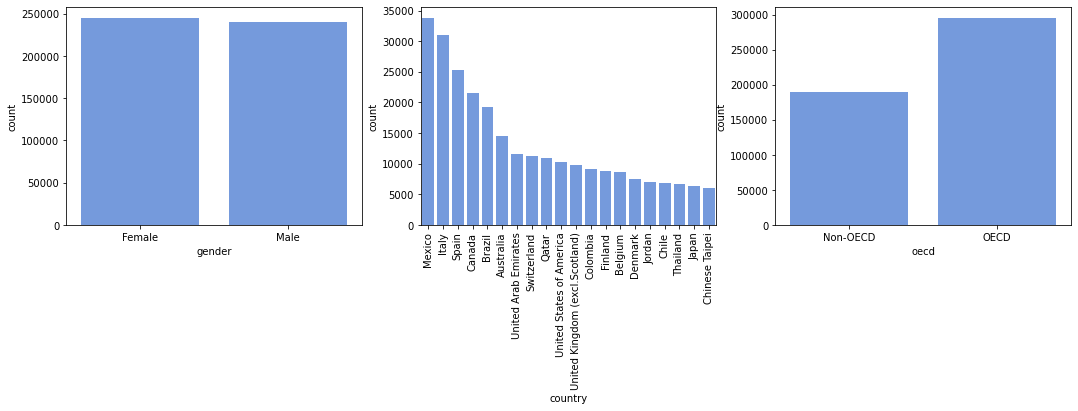

In [119]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sb.countplot(data = pisa_data, x = 'gender', color = 'cornflowerblue');
plt.subplot(132)
sb.countplot(data = pisa_data, x = 'country', order=pisa_data.country.value_counts().iloc[:20].index, color = 'cornflowerblue');
plt.xticks(rotation = 90)
plt.subplot(133)
sb.countplot(data = pisa_data, x = 'oecd', color = 'cornflowerblue');

Data is evenly split between genders. The amount of responses from each country has a wide range, which a heavy representation from North America and Europe. The skew toward North America and Europe may also be due to the higher participation of countries that participate in the OECD. Investigation: Does gender play a role in academic performance and attitudes? Does OECD status provide for better academic performance or better socio-economic status for the students?

### Test Scores
Examine the distributions of the math, reading, and science evaluations of student performance.

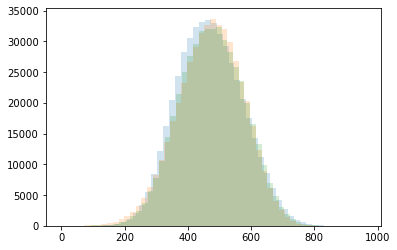

In [6]:
plt.hist(pisa_data.math_score,bins=50, alpha=0.2)
plt.hist(pisa_data.read_score,bins=50, alpha=0.2)
plt.hist(pisa_data.science_score,bins=50, alpha=0.2);

All three evaluations are Normally distributed with centers around 470. Investigation: What contributes to the success or struggle of the groups of students on either end of the spectrum?

### Instructional Minutes
Examine the distribution of instructional minutes of math, language, and science.

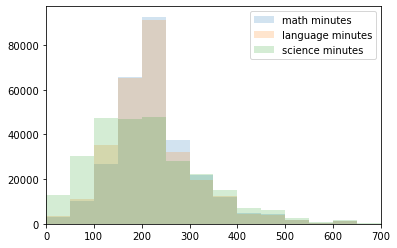

In [7]:
bins = np.arange(0,710,50)
plt.hist(pisa_data.math_min,bins=bins, alpha=0.2)
plt.hist(pisa_data.lang_min,bins=bins, alpha=0.2)
plt.hist(pisa_data.science_min,bins=bins, alpha=0.2)
plt.xlim(0,700)
plt.legend(labels = ['math minutes','language minutes','science minutes']);

Instructional time seems to be consistently spread in math and language,  150-250 minutes per week. Instructional time for science has more variability from student to student. Investigation: how much do instructional minutes effect student performance? attitudes?

### Immigration
Examine the distribution of the different generations of immigrants in the study.

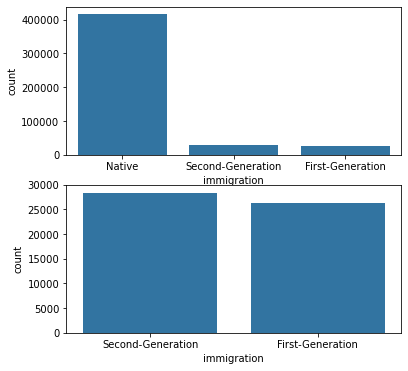

In [8]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(6,6))
plt.subplot(211)
sb.countplot(data = pisa_data, x = 'immigration', color = base_color);
plt.subplot(212)
sb.countplot(data = pisa_data[pisa_data.immigration.isin(['Second-Generation','First-Generation'])], x = 'immigration', color = base_color)
plt.ylim(0,30000);

Most of the students in the data set are native to their country, but there are still considerable numbers of second- and first-generation immigrants to analyze. Investigation: What is the effect of immigration on student behavior and performance? Is it dependent upon the cultural distance of the immigration?

### Parental Education and Employment
Investigate the levels of education and employment for parents.

In [154]:
# organize the levels of parent education in ordered data
levels = ['None', 'ISCED 1', 'ISCED 2', 'ISCED 3B, C', 'ISCED 3A, ISCED 4', 'ISCED 5B', 'ISCED 5A, 6']
edu_levels = pd.api.types.CategoricalDtype(ordered=True, categories = levels)
pisa_data['parent_edu'] = pisa_data['parent_edu'].astype(edu_levels)
pisa_data['father_edu'] = pisa_data['father_edu'].astype(edu_levels)
pisa_data['mother_edu'] = pisa_data['mother_edu'].astype(edu_levels)

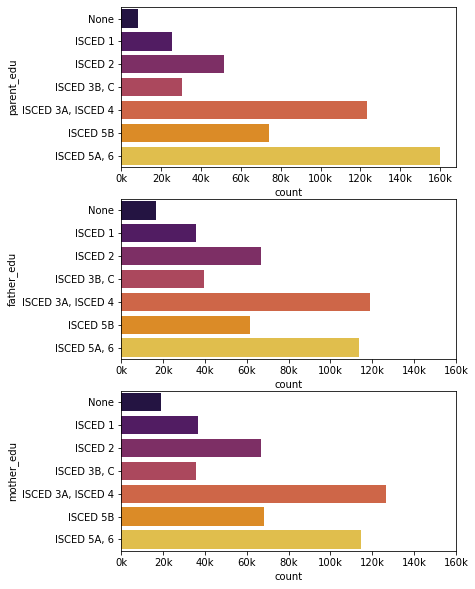

In [10]:
plt.figure(figsize=(6,10))
xticks = np.arange(0,170000,20000)
xlabels = ['0k','20k','40k','60k','80k','100k','120k','140k','160k']
plt.subplot(311)
sb.countplot(data = pisa_data, y = 'parent_edu', palette = 'inferno')
plt.xticks(xticks,xlabels)
plt.subplot(312)
sb.countplot(data = pisa_data, y = 'father_edu', palette = 'inferno')
plt.xticks(xticks,xlabels)
plt.subplot(313)
sb.countplot(data = pisa_data, y = 'mother_edu', palette = 'inferno')
plt.xticks(xticks,xlabels);

Distribution between parental education is fairly consistent between father and mother. Spikes occur at the traditional levels of lower secondary (ISCED 2), upper secondary (ISCED 3A or 4), and university or graduate studies (ISCED 5A or 6). Approximately half of the students in the study have a parent with some college education. Investigation: does further parental education have an effect on student academic performance? attitudes?

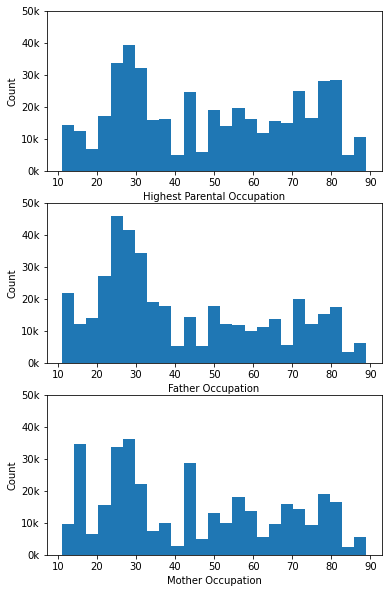

In [28]:
yticks = np.arange(0,51000,10000)
ylabels = ['0k','10k','20k','30k','40k','50k']
plt.figure(figsize=(6,10))
plt.subplot(311)
plt.hist(pisa_data.parent_occ, bins = 25)
plt.yticks(yticks,ylabels)
plt.ylabel('Count')
plt.xlabel('Highest Parental Occupation')
plt.subplot(312)
plt.hist(pisa_data.father_occ_status, bins = 25)
plt.yticks(yticks,ylabels)
plt.ylabel('Count')
plt.xlabel('Father Occupation')
plt.subplot(313)
plt.hist(pisa_data.mother_occ_status, bins = 25)
plt.yticks(yticks,ylabels)
plt.ylabel('Count')
plt.xlabel('Mother Occupation');

In [12]:
pisa_data[['parent_occ','father_occ_status','mother_occ_status']].describe()

,parent_occ,father_occ_status,mother_occ_status
count,450621.000000,416150.000000,364814.000000
mean,48.923298,42.423367,44.408617
std,22.120953,21.622126,22.018510
min,11.010000,11.010000,11.010000
25%,28.520000,25.390000,25.040000
50%,48.820000,34.250000,43.330000
75%,70.340000,60.920000,65.010000
max,88.960000,88.960000,88.960000


Distribution of occupational level for parents is fairly spread out with a mean of approximately 49 and a standard deviation of 22 (with a minumum of 11 and maximum of 89). When parental occupation is analyzed by gender, the lower quartiles are fairly similar to one another, then the distribution of mother's occupation takes a small lead over father's occupation. Investigation: Which parent's employment has a stronger influence on student academic performance?

### Educational Beginnings
Investigate how the students' education began. Age of enrollment in primary school and age at which they began to study their current language.

In [13]:
# explore the possible values for preschool value
pisa_data['preschool'].unique()

array(['No  ', 'Yes, for more than one year',
       'Yes, for one year or less ', nan], dtype=object)

In [163]:
# create a categorical with ordinal values for the student experience with preschool
levels = ['No  ', 'Yes, for one year or less ', 'Yes, for more than one year']
preschool_levels = pd.api.types.CategoricalDtype(ordered=True, categories = levels)
pisa_data['preschool'] = pisa_data['preschool'].astype(preschool_levels)

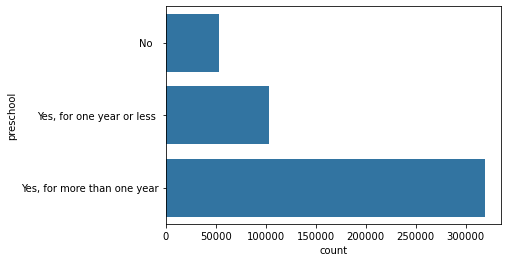

In [15]:
sb.countplot(data = pisa_data, y = 'preschool', color = base_color);

A majority of the students participated in a preschool for more than one year.

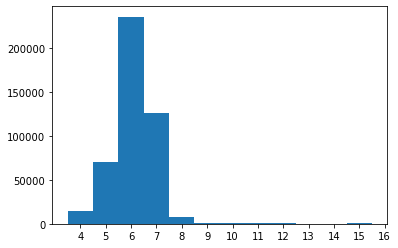

In [16]:
bins = np.arange(4, 17, 1)
plt.hist(pisa_data['age_edu_start'], bins = bins)
plt.xticks(bins+0.5, bins);

Most children began their formal education between the ages of 4 and 8. Investigation: does earlier enrollment provide benefits a decade later (at the time of the survey)?

In [17]:
# create a categorical variable with ordinal values according to the context of beginning language
levels = ['0 to 3 years', '4 to 6 years','7 to 9 years', '10 to 12 years', '13 years or older']
lang_age = pd.api.types.CategoricalDtype(ordered=True, categories = levels)
pisa_data['age_lang_start'] = pisa_data['age_lang_start'].astype(lang_age)

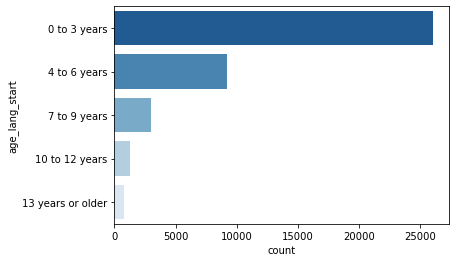

In [18]:
sb.countplot(data = pisa_data, y = 'age_lang_start', palette = 'Blues_r');

Data does not exist for most of the students in the study, but for those with data, most are relatively native speakers of their language or began learning their language in the years of preschool or primary school. Investigation: Do students with an early language edge carry that edge to the edge of this assessment?

### Family Structure
Distribution of family structure.

In [19]:
pisa_data.fam_struct.value_counts()

2.0    360003
1.0     58264
3.0     10791
Name: fam_struct, dtype: int64

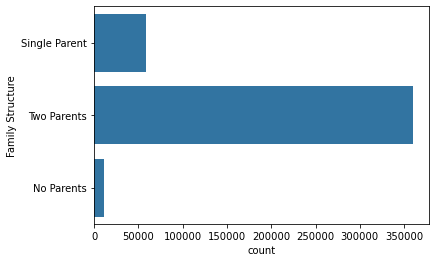

In [20]:
g = sb.countplot(data = pisa_data, y = 'fam_struct', color = base_color)
g.set_yticklabels(['Single Parent','Two Parents','No Parents'])
plt.ylabel('Family Structure');

A strong majority of the students have a two-parent household, but there are still considerable amounts of students in single-parent household and other family arrangements. Investigations will explore family structure influence on socio-economic status and academic performance.

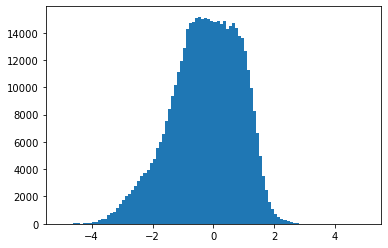

In [21]:
plt.hist(pisa_data.status_index, bins = np.arange(-5,5.1,0.1));

The index of social, economic, and cultural status above has a significant left-skew, making it noticeably more likely to have a score between -4 and -2 than a score between 2 and 4. In later stages, it would be worth investigating the performance of those student in the left skew.

### Student Factors
Investigate the contributions of student factors.

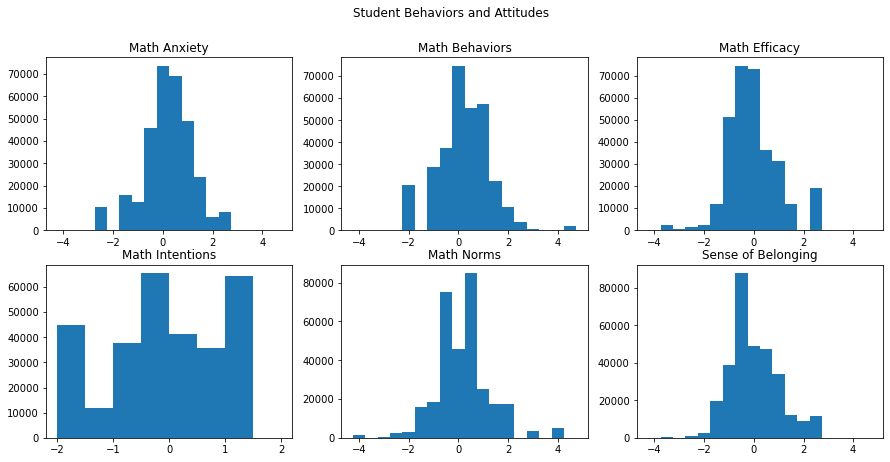

In [22]:
std_bins = np.arange(-4.25,4.8,0.5)
plt.figure(figsize = (15,7))
plt.subplot(231)
plt.hist(pisa_data.math_anxiety, bins = std_bins)
plt.title('Math Anxiety');
plt.subplot(232)
plt.hist(pisa_data.math_behaviors, bins = std_bins)
plt.title('Math Behaviors');
plt.subplot(233)
plt.hist(pisa_data.math_efficacy, bins = std_bins)
plt.title('Math Efficacy');
plt.subplot(234)
plt.hist(pisa_data.math_intentions, bins = np.arange(-2,2.2,0.5))
plt.title('Math Intentions');
plt.subplot(235)
plt.hist(pisa_data.math_norm, bins = std_bins)
plt.title('Math Norms');
plt.subplot(236)
plt.hist(pisa_data.belong, bins = std_bins)
plt.title('Sense of Belonging');
plt.suptitle('Student Behaviors and Attitudes');

Most distributions are fairly symmetric, which we expect for a Normalized scores such as these. There are noticable extremes in some of these distributions that may be worth further investigation (math behaviors above 4, math efficacy/confidence under -3, math norms/socialization of -4 or 4).

### Teacher Factors
Investigate the distributions of teacher factors.

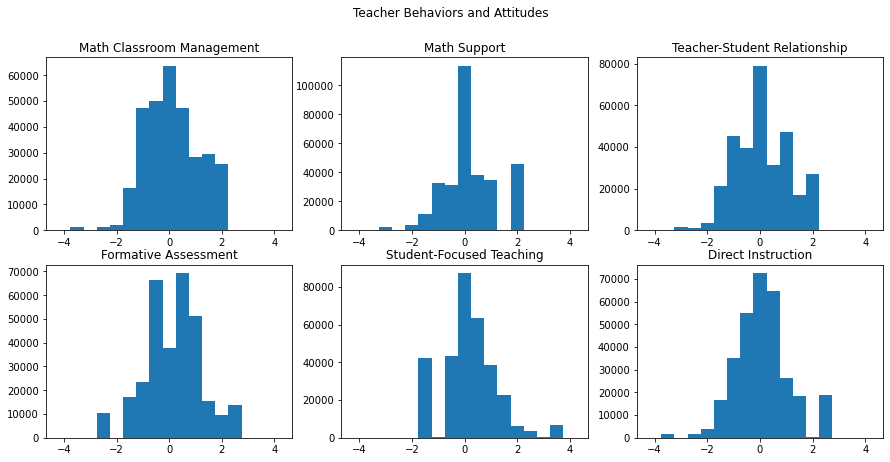

In [23]:
std_bins = np.arange(-4.25,4.5,0.5)
plt.figure(figsize = (15,7))
plt.subplot(231)
plt.hist(pisa_data.teacher_math_man, bins = std_bins)
plt.title('Math Classroom Management');
plt.subplot(232)
plt.hist(pisa_data.teacher_math_sup, bins = std_bins)
plt.title('Math Support');
plt.subplot(233)
plt.hist(pisa_data.teacher_rel, bins = std_bins)
plt.title('Teacher-Student Relationship');
plt.subplot(234)
plt.hist(pisa_data.teacher_form, bins = std_bins)
plt.title('Formative Assessment');
plt.subplot(235)
plt.hist(pisa_data.teacher_stud_focus, bins = std_bins)
plt.title('Student-Focused Teaching');
plt.subplot(236)
plt.hist(pisa_data.teacher_lect, bins = std_bins)
plt.title('Direct Instruction');
plt.suptitle('Teacher Behaviors and Attitudes');

Most distributions are fairly symmetric, which we expect for a Normalized scores such as these. There are noticable extremes in some of these distributions that may be worth further investigation (classroom management below -2, math support below -2, teacher-student relationships below -2, student-focused teaching above 3, direct instruction below -3).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Preschool enrollment, language initiation, and family structure provide good sorting values to investigation early family decisions on the performance, behaviors, and attitudes of the student. There are also extreme values in some of the student behaviors, teacher behaviors, and social, economic, and cultural index of the families.

> No transformations were necessary to explore this data in a univariate manner. Many are Normally distributed, so it may require some conversion in bivariate or multivariate exploration.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Parental occupation has a unique distribution. No clear pattern or discernable shape.

> Many variables were converted from strings to ordinal categorical variables to further aid additional analysis. This allows the categories to show up in their logical order, which improves the readability of the graphs and subsequent analysis.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Preschool Effect on Academic Performance

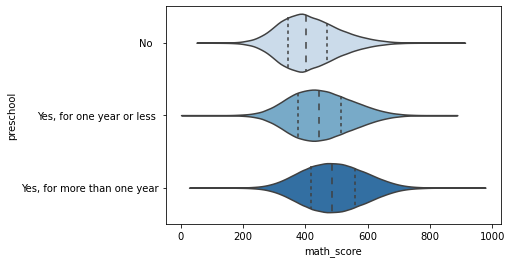

In [66]:
sb.violinplot(data = pisa_data, y = 'preschool', x = 'math_score', inner='quartile', palette = 'Blues');

Preschool has a positive effect on test scores. Moving the median up 30-50 points per year of preschool experience.

### Immigration Generation vs. Academic Performance

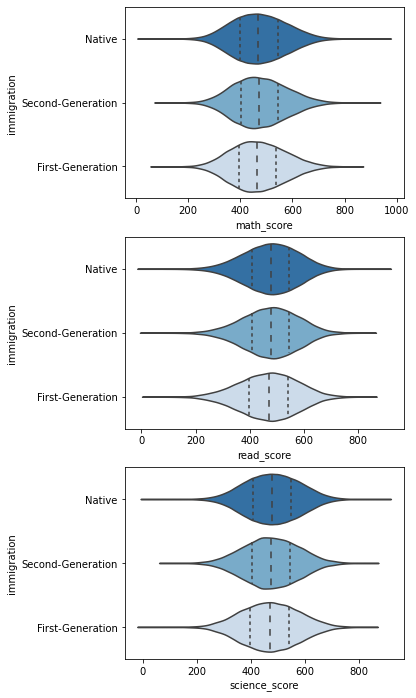

In [142]:
plt.figure(figsize=(5,12))
plt.subplot(311)
sb.violinplot(data = pisa_data, y = 'immigration', x = 'math_score', inner = 'quartile', palette = 'Blues_r');
plt.subplot(312)
sb.violinplot(data = pisa_data, y = 'immigration', x = 'read_score', inner = 'quartile', palette = 'Blues_r');
plt.subplot(313)
sb.violinplot(data = pisa_data, y = 'immigration', x = 'science_score', inner = 'quartile', palette = 'Blues_r');

No discernible difference in academic performance for immigration status.

### Immigration, Status, and Belonging

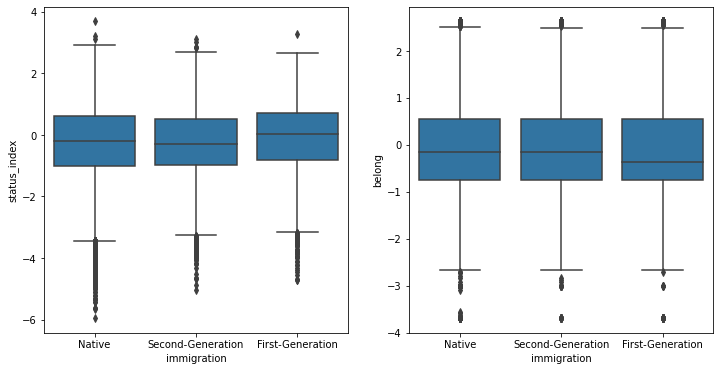

In [149]:
plt.figure(figsize = (12, 6))
plt.subplot(121)
sb.boxplot(data = pisa_data, x = 'immigration', y = 'status_index', color = base_color);
plt.subplot(122)
sb.boxplot(data = pisa_data, x = 'immigration', y = 'belong', color = base_color);

No considerable difference in social status or sense of belonging according to social status.

### Parental Occupation Status vs. Academic Performance

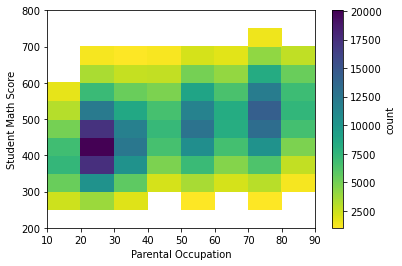

In [214]:
occ_bins = np.arange(10,95,10)
score_bins = np.arange(200,850,50)
plt.hist2d(data = pisa_data, x = 'parent_occ', y = 'math_score', bins = [occ_bins, score_bins], cmin = 1000, cmap = 'viridis_r')
plt.colorbar(label = 'count')
plt.xlabel('Parental Occupation')
plt.ylabel('Student Math Score');

A noted positive correlation between parental occupation and academic achievement. Still a broad range of achievement at every level of parental occupation.

### Parental Education vs. Student Academics

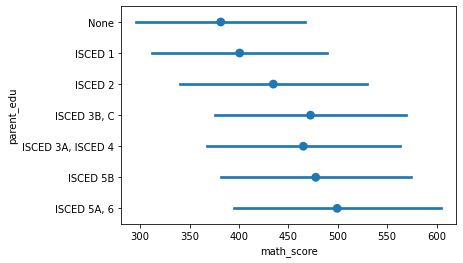

In [158]:
sb.pointplot(data = pisa_data, y = 'parent_edu', x = 'math_score', ci = 'sd', linestyles = "");

The level of parental education is strongly correlated to the level of student achievement.

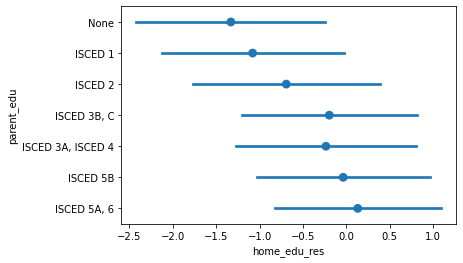

In [168]:
sb.pointplot(data = pisa_data, y = 'parent_edu', x = 'home_edu_res', ci = 'sd', linestyles = "");

Parental education is also related to the availability of educational resources at home.

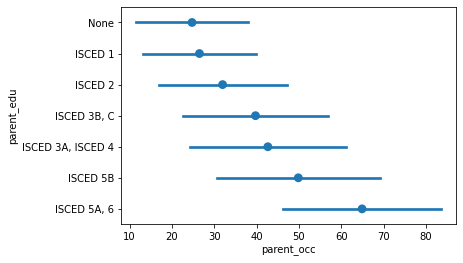

In [169]:
sb.pointplot(data = pisa_data, y = 'parent_edu', x = 'parent_occ', ci = 'sd', linestyles = "");

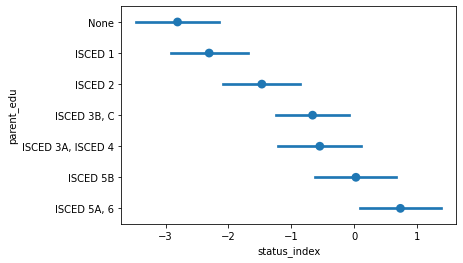

In [175]:
sb.pointplot(data = pisa_data, y = 'parent_edu', x = 'status_index', ci = 'sd', linestyles = "");

Parental education is also related with higher employment and social status for the family. 

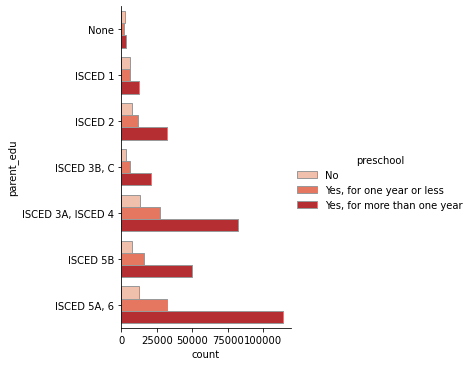

In [164]:
sb.catplot(y="parent_edu", hue="preschool", kind="count",
            palette="Reds", edgecolor=".6",
            data=pisa_data);

Rates of preschool attendance appear to be independent of parental education level.

### Family Structure and Status on Student Performance and Attitudes

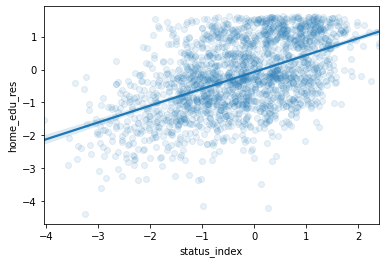

In [194]:
sb.regplot(data = pisa_data.sample(2000), x = 'status_index', y = 'home_edu_res', y_jitter = 0.5, scatter_kws = {'alpha':0.1});

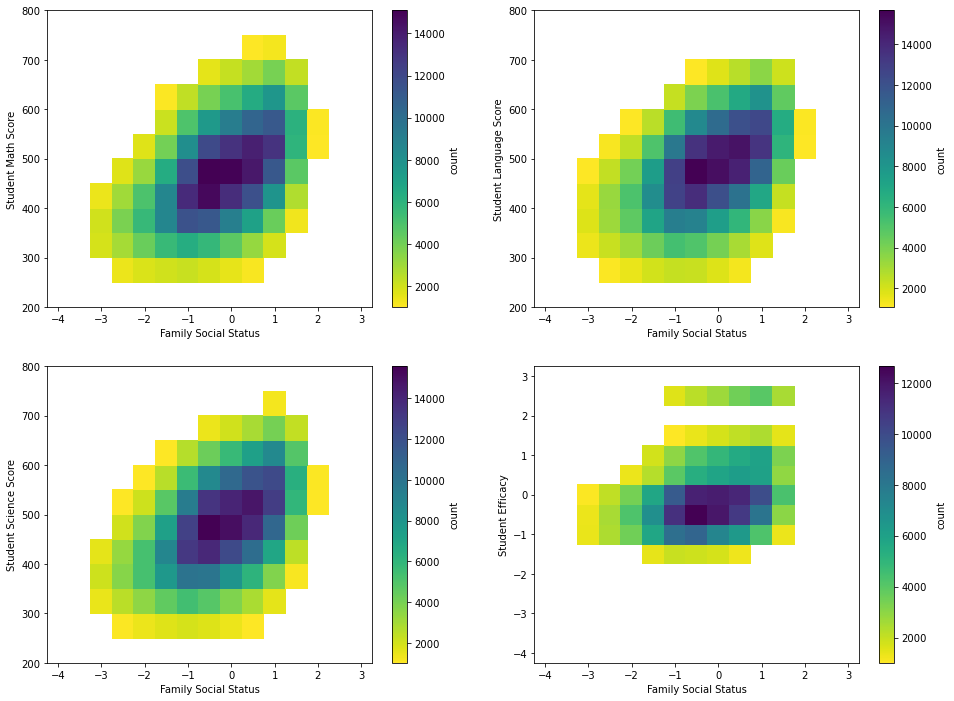

In [220]:
std_bins = np.arange(-4.25,3.5,0.5)
score_bins = np.arange(200,850,50)
plt.figure(figsize = (16, 12))
plt.subplot(221)
plt.hist2d(data = pisa_data, x = 'status_index', y = 'math_score', bins = [std_bins, score_bins], cmin = 1000, cmap = 'viridis_r')
plt.colorbar(label = 'count')
plt.xlabel('Family Social Status')
plt.ylabel('Student Math Score');
plt.subplot(222)
plt.hist2d(data = pisa_data, x = 'status_index', y = 'read_score', bins = [std_bins, score_bins], cmin = 1000, cmap = 'viridis_r')
plt.colorbar(label = 'count')
plt.xlabel('Family Social Status')
plt.ylabel('Student Language Score');
plt.subplot(223)
plt.hist2d(data = pisa_data, x = 'status_index', y = 'science_score', bins = [std_bins, score_bins], cmin = 1000, cmap = 'viridis_r')
plt.colorbar(label = 'count')
plt.xlabel('Family Social Status')
plt.ylabel('Student Science Score');
plt.subplot(224)
plt.hist2d(data = pisa_data, x = 'status_index', y = 'math_efficacy', bins = [std_bins, std_bins], cmin = 1000, cmap = 'viridis_r')
plt.colorbar(label = 'count')
plt.xlabel('Family Social Status')
plt.ylabel('Student Efficacy');

### Confluence of Mathematical Performance, Behaviors, Confidence, and Social Norms

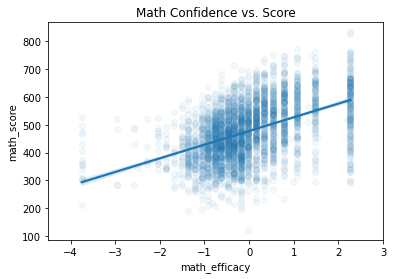

In [81]:
sb.regplot(data = pisa_data.sample(5000), x = 'math_efficacy', y = 'math_score', fit_reg=True, scatter_kws = {'alpha': 0.05});
plt.xlim(-4.5, 3);
plt.title('Math Confidence vs. Score');

A significant difference and trend between math confidence and math score. It appears that, on average, students know how good they are at the math tasks set before them.

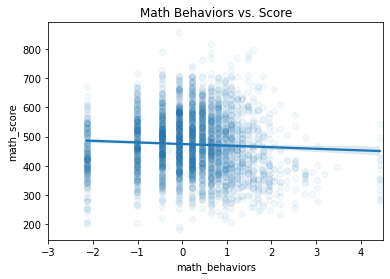

In [86]:
sb.regplot(data = pisa_data.sample(5000), x = 'math_behaviors', y = 'math_score', fit_reg=True, scatter_kws = {'alpha': 0.05});
plt.xlim(-3, 4.5);
plt.title('Math Behaviors vs. Score');

Surprisingly, math performance seems to have little or nothing to do with mathematical behaviors, such as helping friends with math homework or participating in math-related extracurriculars.

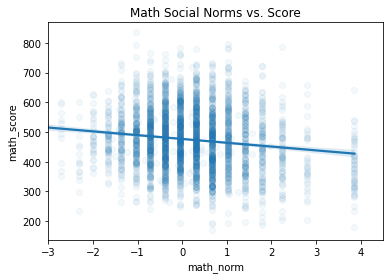

In [87]:
sb.regplot(data = pisa_data.sample(5000), x = 'math_norm', y = 'math_score', fit_reg=True, scatter_kws = {'alpha': 0.05});
plt.xlim(-3, 4.5);
plt.title('Math Social Norms vs. Score');

Mathematical social norms (discussing and encouraging math performance by family and friends) also shows little effect on math performance. 

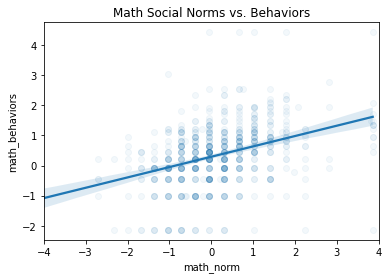

In [93]:
sb.regplot(data = pisa_data.sample(1000), x = 'math_norm', y = 'math_behaviors', fit_reg=True, scatter_kws = {'alpha': 0.05});
plt.xlim(-4, 4);
plt.title('Math Social Norms vs. Behaviors');

Although neither social norms nor behavior influene mathematical performace in the previous analysis, it can be seen that with more math in the normal social circles (family and friends), average engagement in mathematical behaviors does increase.

### Gender, Performance, Confidence

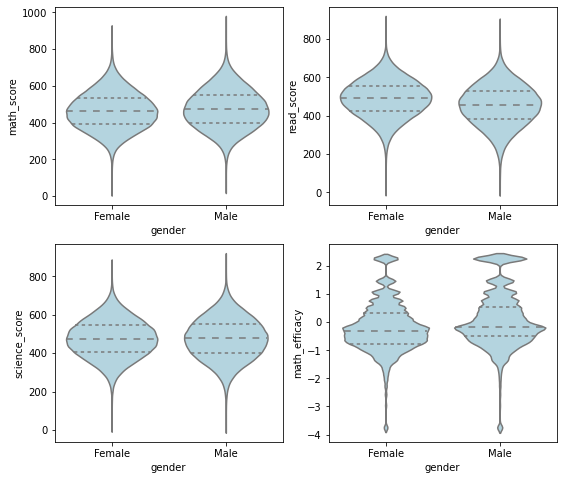

In [129]:
plt.figure(figsize = (9,8))
plt.subplot(221)
sb.violinplot(data = pisa_data, x = 'gender', y = 'math_score', color = 'lightblue', inner = 'quartile');
plt.subplot(222)
sb.violinplot(data = pisa_data, x = 'gender', y = 'read_score', color = 'lightblue', inner = 'quartile');
plt.subplot(223)
sb.violinplot(data = pisa_data, x = 'gender', y = 'science_score', color = 'lightblue', inner = 'quartile');
plt.subplot(224)
sb.violinplot(data = pisa_data, x = 'gender', y = 'math_efficacy', color = 'lightblue', inner = 'quartile');

There is not much difference in academic performance between gender. Male students performed marginally better than female students in math, but female students perform noticably better in language. The distributions of self-efficacy in maths are not smooth or symmetric; the distributions are similar for the most part.

### OECD Status and Performance

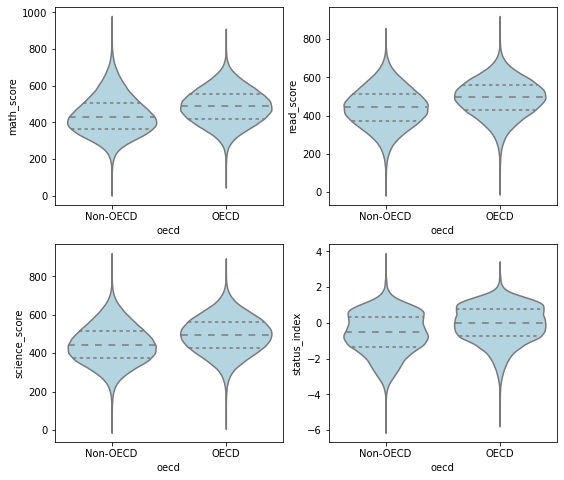

In [136]:
plt.figure(figsize = (9,8))
plt.subplot(221)
sb.violinplot(data = pisa_data, x = 'oecd', y = 'math_score', color = 'lightblue', inner = 'quartile');
plt.subplot(222)
sb.violinplot(data = pisa_data, x = 'oecd', y = 'read_score', color = 'lightblue', inner = 'quartile');
plt.subplot(223)
sb.violinplot(data = pisa_data, x = 'oecd', y = 'science_score', color = 'lightblue', inner = 'quartile');
plt.subplot(224)
sb.violinplot(data = pisa_data, x = 'oecd', y = 'status_index', color = 'lightblue', inner = 'quartile');

OECD partnership status is related to an advantage in all academic performance areas as well as social, economic, and cultural status. The advantage is not large, but it is noticable and consistent across those areas.

### Teacher Behaviors by OECD Status

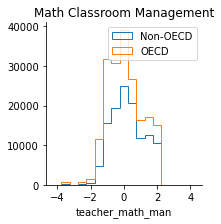

In [167]:
std_bins = np.arange(-4.25,4.5,0.5)
g = sb.FacetGrid(data = pisa_data, hue = 'oecd')
g.map(plt.hist, 'teacher_math_man', bins = std_bins, histtype = 'step')
plt.title('Math Classroom Management');
plt.legend();

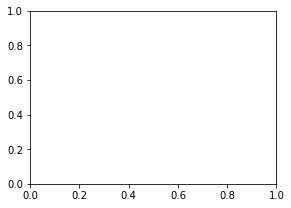

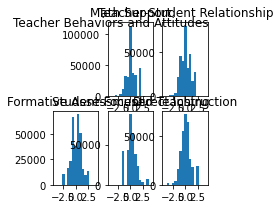

In [165]:
plt.figure(figsize = (15,7))
plt.subplot(231)
g = sb.FacetGrid(data = pisa_data, hue = 'oecd')
g.map(plt.hist, 'teacher_math_man', bins = std_bins, histtype = 'step')
plt.title('Math Classroom Management');
plt.subplot(232)
plt.hist(pisa_data.teacher_math_sup, bins = std_bins)
plt.title('Math Support');
plt.subplot(233)
plt.hist(pisa_data.teacher_rel, bins = std_bins)
plt.title('Teacher-Student Relationship');
plt.subplot(234)
plt.hist(pisa_data.teacher_form, bins = std_bins)
plt.title('Formative Assessment');
plt.subplot(235)
plt.hist(pisa_data.teacher_stud_focus, bins = std_bins)
plt.title('Student-Focused Teaching');
plt.subplot(236)
plt.hist(pisa_data.teacher_lect, bins = std_bins)
plt.title('Direct Instruction');
plt.suptitle('Teacher Behaviors and Attitudes');

### Teacher Behaviors vs. Student Performance

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!